# Final Project: Stock price prediction using LSTMs


Uzair Ramzan Parveen, 251599

Eric Vilardell Regué, 254469

Mari Taira, 289687

## Imports

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import GRU, LSTM, Dense, Dropout
from keras.optimizers import Adam
import yfinance as yf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import warnings

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')




## Source library loading

In [ ]:
!pip install yfinance
yf.pdr_override()

yfinance: pandas_datareader support is deprecated & semi-broken so will be removed in a future verison. Just use yfinance.


# Models using 1 feature

In [ ]:
# Fetching data for our company
comp = 'AAPL'
data = yf.download(comp, start='2022-01-01', end='2024-05-31')
single_feature = data.filter(['Close'])
data_ap = single_feature.values

# Data nomralization
scaler = StandardScaler()
sdata_ap = scaler.fit_transform(data_ap)

# Splitting into training and testing sets (80-20 split)
tlen_ap = int(np.ceil(len(sdata_ap) * 0.8))
train_data_ap = sdata_ap[0:int(tlen_ap), :]

# Splitting into features and labels
x_trainap, y_trainap = [], []
for i in range(60, len(train_data_ap)):
    x_trainap.append(train_data_ap[i - 60:i, 0])
    y_trainap.append(train_data_ap[i,0])

# conversion to numpy array and reshaping the data
x_trainap, y_trainap = np.array(x_trainap), np.array(y_trainap)
x_trainap = np.reshape(x_trainap, (x_trainap.shape[0], x_trainap.shape[1], 1))
# print(x_trainap.shape)

[*********************100%%**********************]  1 of 1 completed


# LSTM model (3 hidden layers: 50, 50, 25 units) using 1 feature

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 25)                7600      
                                                                 
 dense (Dense)               (None, 1)                 26        
                                                                 
Total params: 38226 (149.32 KB)
Trainable params: 38226 (149.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
424/424 [==============================] - 27s 45ms/step - loss: 0.1508
Epoch 2/10
424/424 [==============================] - 17s 41ms/step

<ipython-input-5-5c3926b900df>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = predictions


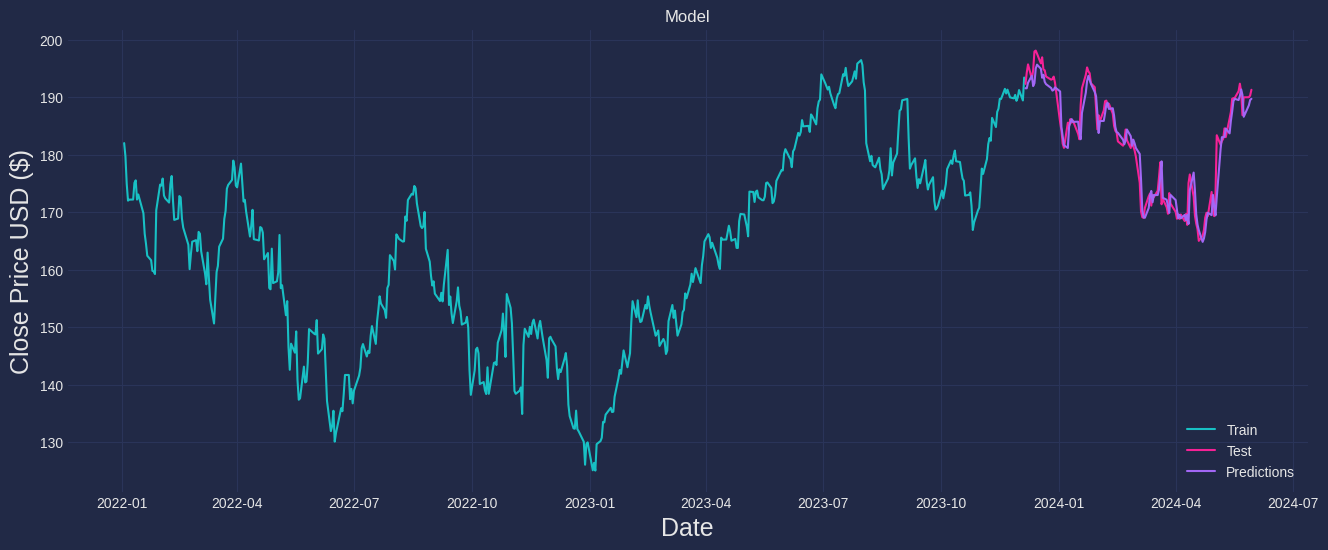

In [ ]:
# Establishing our network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_trainap.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=25))
model.add(Dense(units=1))
model.summary()

# Compiling and training the LSTM model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_trainap, y_trainap, batch_size=1, epochs=10)

# Preparing test data for making predictions
test_data_ap = sdata_ap[tlen_ap - 60:, :]
x_testap = []
y_testap = data_ap[tlen_ap:,:]
for i in range(60, len(test_data_ap)):
    x_testap.append(test_data_ap[i -60:i, 0])

# Conversion to numpy and reshaping
x_testap = np.array(x_testap)
x_testap = np.reshape(x_testap, (x_testap.shape[0], x_testap.shape[1], 1))

# Making predictions
predictions = model.predict(x_testap)
predictions = scaler.inverse_transform(predictions)

# Obtaining the error (RMSE)
rmse = np.sqrt(mean_squared_error(y_testap, predictions))
print(f'Root Mean Squared Error: {rmse}')


# Plotting our predictions next to the actual values
dataset = data.filter(['Close'])
train = dataset[:tlen_ap]
test = dataset[tlen_ap:]
test['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(test[['Close', 'Predictions']])
plt.legend(['Train', 'Test', 'Predictions'], loc='lower right')
plt.show()


# GRU model (3 hidden layers: 50, 50, 25 units) using 1 feature

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 60, 50)            7950      
                                                                 
 gru_1 (GRU)                 (None, 60, 50)            15300     
                                                                 
 gru_2 (GRU)                 (None, 25)                5775      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 29051 (113.48 KB)
Trainable params: 29051 (113.48 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
424/424 [==============================] - 22s 39ms/step - loss: 0.0877
Epoch 2/10
424/424 [==============================] - 18s 43ms/st

<ipython-input-6-de20efb8d964>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = predictionsLSTM


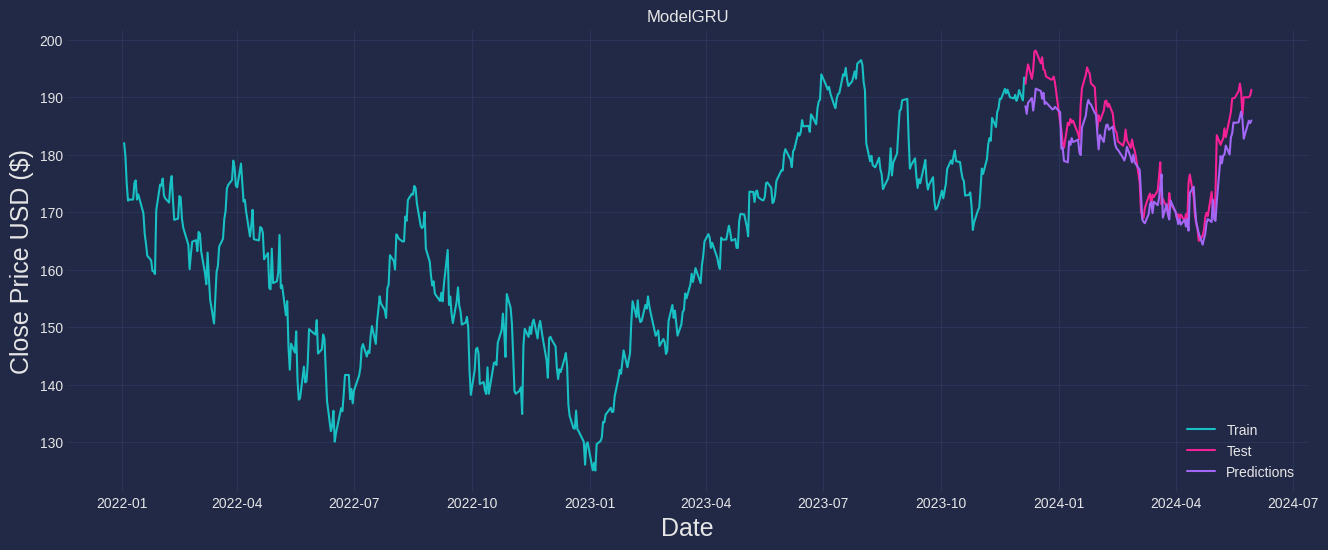

In [ ]:
# Establishing our network
modelGRU = Sequential()
modelGRU.add(GRU(units=50, return_sequences=True, input_shape=(x_trainap.shape[1], 1)))
modelGRU.add(GRU(units=50, return_sequences=True))
modelGRU.add(GRU(units=25))
modelGRU.add(Dense(units=1))
modelGRU.summary()

# Compiling and training the GRU model
modelGRU.compile(optimizer='adam', loss='mean_squared_error')
modelGRU.fit(x_trainap, y_trainap, batch_size=1, epochs=10)

# Preparing test data for making predictions
test_data_ap = sdata_ap[tlen_ap - 60:, :]
x_testap = []
y_testap = data_ap[tlen_ap:,:]
for i in range(60, len(test_data_ap)):
    x_testap.append(test_data_ap[i -60:i, 0])

# Conversion to numpy and reshaping
x_testap = np.array(x_testap)
x_testap = np.reshape(x_testap, (x_testap.shape[0], x_testap.shape[1], 1))

# Make the predictions
predictionsLSTM = modelGRU.predict(x_testap)
predictionsLSTM = scaler.inverse_transform(predictionsLSTM)

# Obtaining the error
rmse = np.sqrt(mean_squared_error(y_testap, predictionsLSTM))
print(f'Root Mean Squared Error: {rmse}')

# Plotting our predictions next to the actual values
dataset = data.filter(['Close'])
train = dataset[:tlen_ap]
test = dataset[tlen_ap:]
test['Predictions'] = predictionsLSTM
#visualize the data
plt.figure(figsize=(16,6))
plt.title('ModelGRU')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(test[['Close', 'Predictions']])
plt.legend(['Train', 'Test', 'Predictions'], loc='lower right')
plt.show()

# LSTM model (3 hidden layers: 10, 10, 5 units) using 1 feature

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 60, 10)            480       
                                                                 
 lstm_7 (LSTM)               (None, 60, 10)            840       
                                                                 
 lstm_8 (LSTM)               (None, 5)                 320       
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 1646 (6.43 KB)
Trainable params: 1646 (6.43 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
424/424 [==============================] - 32s 39ms/step - loss: 0.2522
Epoch 2/10
424/424 [==============================] - 16s 38ms/step - l

<ipython-input-8-a294ddb34702>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = predictions


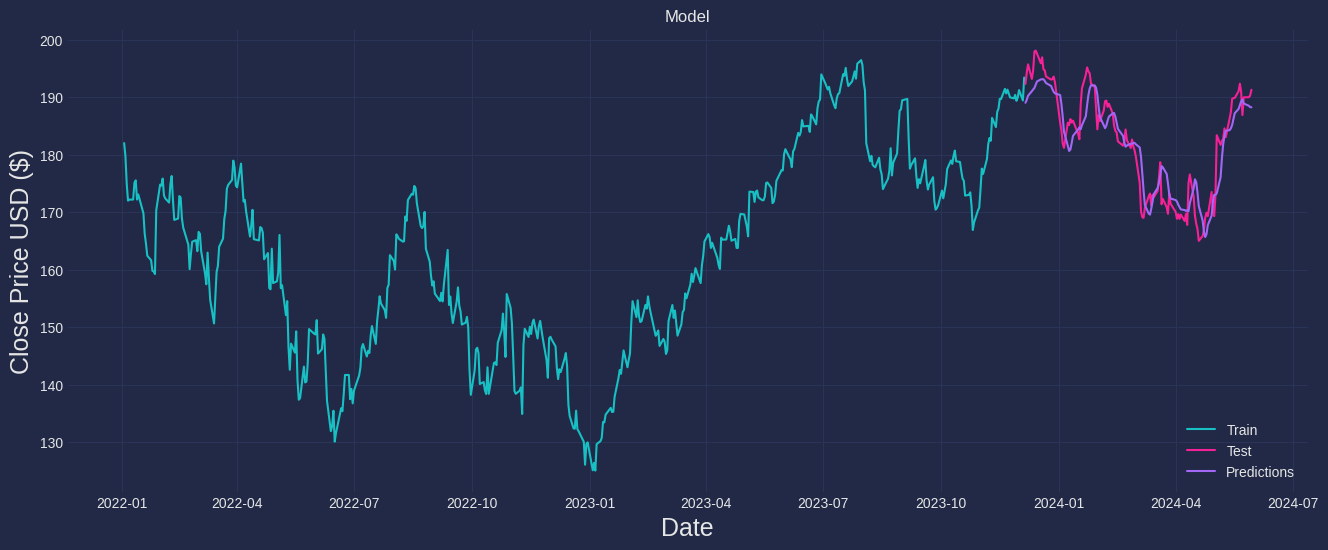

In [ ]:
# Establishing our network
model = Sequential()
model.add(LSTM(units=10, return_sequences=True, input_shape=(x_trainap.shape[1], 1)))
model.add(LSTM(units=10, return_sequences=True))
model.add(LSTM(units=5))
model.add(Dense(units=1))
model.summary()

# Compiling and training the LSTM model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_trainap, y_trainap, batch_size=1, epochs=10)

# Making predictions
predictions = model.predict(x_testap)
predictions = scaler.inverse_transform(predictions)

# Obtaining the error (RMSE)
rmse = np.sqrt(mean_squared_error(y_testap, predictions))
print(f'Root Mean Squared Error: {rmse}')

# Plotting our predictions next to the actual values
dataset = data.filter(['Close'])
train = dataset[:tlen_ap]
test = dataset[tlen_ap:]
test['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(test[['Close', 'Predictions']])
plt.legend(['Train', 'Test', 'Predictions'], loc='lower right')
plt.show()


# GRU model (3 hidden layers: 10, 10, 5 units) using 1 feature

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3 (GRU)                 (None, 60, 10)            390       
                                                                 
 gru_4 (GRU)                 (None, 60, 10)            660       
                                                                 
 gru_5 (GRU)                 (None, 5)                 255       
                                                                 
 dense_4 (Dense)             (None, 1)                 6         
                                                                 
Total params: 1311 (5.12 KB)
Trainable params: 1311 (5.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
424/424 [==============================] - 21s 39ms/step - loss: 0.2151
Epoch 2/10
424/424 [==============================] - 16s 37ms/step - l

<ipython-input-9-536daeb7dd1d>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = predictions


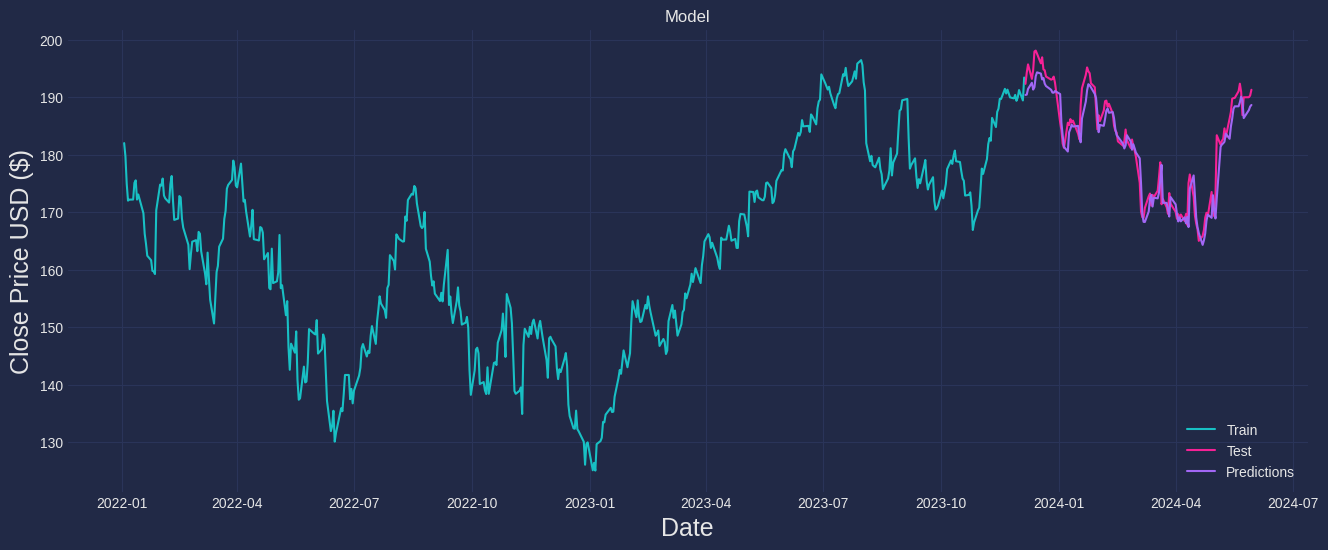

In [ ]:
# Establishing our network
model = Sequential()
model.add(GRU(units=10, return_sequences=True, input_shape=(x_trainap.shape[1], 1)))
model.add(GRU(units=10, return_sequences=True))
model.add(GRU(units=5))
model.add(Dense(units=1))   #dense a 10 unidades para que te devuelva 10 neuronas
model.summary()

# Compiling and training the LSTM model
model.compile(optimizer='adam', loss='mean_squared_error')         ##try sgd optimizer
model.fit(x_trainap, y_trainap, batch_size=1, epochs=10)

# Making predictions
predictions = model.predict(x_testap)
predictions = scaler.inverse_transform(predictions)

# Obtaining the error (RMSE)
rmse = np.sqrt(mean_squared_error(y_testap, predictions))
print(f'Root Mean Squared Error: {rmse}')

# Plotting our predictions next to the actual values
dataset = data.filter(['Close'])
train = dataset[:tlen_ap]
test = dataset[tlen_ap:]
test['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(test[['Close', 'Predictions']])
plt.legend(['Train', 'Test', 'Predictions'], loc='lower right')
plt.show()


##Add Jittering (Gaussian Noise)

In [ ]:
# Jittering function
def jitter(series, sigma=0.01):
    return series + np.random.normal(loc=0, scale=sigma, size=series.shape)

# Apply jittering to the training data
x_trainap_jittered = []
y_trainap_jittered = []

# Add jitter to each sequence in the training data
for i in range(len(x_trainap)):
    jittered_sequence = jitter(x_trainap[i], sigma=0.01)
    x_trainap_jittered.append(jittered_sequence)
    y_trainap_jittered.append(y_trainap[i])     # added solely to

# Convert list to numpy array
x_trainap_jittered = np.array(x_trainap_jittered)
y_trainap_jittered = np.array(y_trainap_jittered)

# Combine original and jittered data
x_trainap_jittered = np.concatenate((x_trainap, x_trainap_jittered), axis=0)
y_trainap_jittered = np.concatenate((y_trainap, y_trainap_jittered), axis=0)

##Magnify

In [ ]:
from scipy.interpolate import interp1d
# Magnify Function
def magnify(series, min_ratio=0.4, max_ratio=0.8):
    ratio = np.random.uniform(min_ratio, max_ratio)
    end_index = int(len(series) * ratio)
    magnified_series = series[-end_index:]

    # Interpolate back to the original size
    original_indices = np.linspace(0, len(series) - 1, num=len(series))
    magnified_indices = np.linspace(0, len(series) - 1, num=end_index)
    interpolator = interp1d(magnified_indices, magnified_series, axis=0, kind='linear')
    magnified_series_resampled = interpolator(original_indices)

    return magnified_series_resampled

# Apply magnification to training data
augmented_x_trainap = []
augmented_y_trainap = []
for x, y in zip(x_trainap, y_trainap):
    magnified_x = magnify(x)
    augmented_x_trainap.append(magnified_x)
    augmented_y_trainap.append(y)

# Conversion to numpy array and reshaping the augmented data
augmented_x_trainap = np.array(augmented_x_trainap)
augmented_y_trainap = np.array(augmented_y_trainap)
augmented_x_trainap = np.reshape(augmented_x_trainap, (augmented_x_trainap.shape[0], augmented_x_trainap.shape[1], 1))

# Combine original and augmented data
x_trainap_magnified = np.concatenate((x_trainap, augmented_x_trainap), axis=0)
y_trainap_magnified = np.concatenate((y_trainap, augmented_y_trainap), axis=0)

## LSTM model (3 hidden layers: 50, 50, 25 units) using 1 feature

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 60, 50)            10400     
                                                                 
 lstm_13 (LSTM)              (None, 60, 50)            20200     
                                                                 
 lstm_14 (LSTM)              (None, 25)                7600      
                                                                 
 dense_6 (Dense)             (None, 1)                 26        
                                                                 
Total params: 38226 (149.32 KB)
Trainable params: 38226 (149.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
424/424 [==============================] - 25s 41ms/step - loss: 0.1753
Epoch 2/10
424/424 [==============================] - 17s 41ms/st

<ipython-input-13-8381b1ba7573>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = predictions


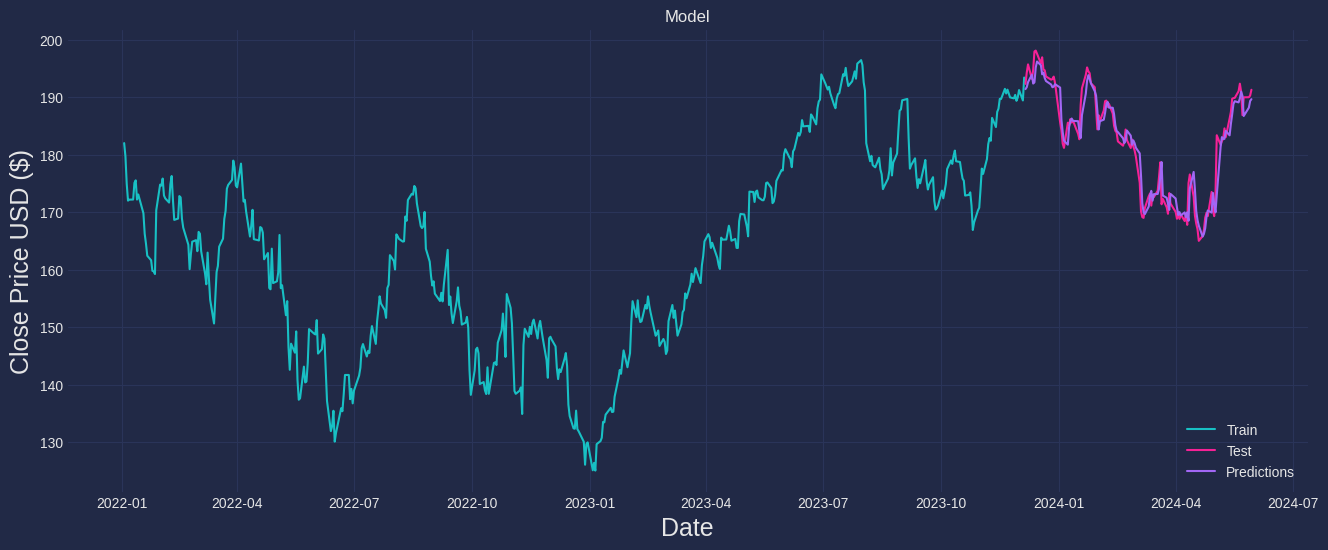

In [ ]:
# Establishing our network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_trainap.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=25))
model.add(Dense(units=1))
model.summary()

# Compiling and training the LSTM model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_trainap, y_trainap, batch_size=1, epochs=10)

# Preparing test data for making predictions
test_data_ap = sdata_ap[tlen_ap - 60:, :]
x_testap = []
y_testap = data_ap[tlen_ap:,:]
for i in range(60, len(test_data_ap)):
    x_testap.append(test_data_ap[i -60:i, 0])

# Conversion to numpy and reshaping
x_testap = np.array(x_testap)
x_testap = np.reshape(x_testap, (x_testap.shape[0], x_testap.shape[1], 1))

# Making predictions
predictions = model.predict(x_testap)
predictions = scaler.inverse_transform(predictions)

# Obtaining the error (RMSE)
rmse = np.sqrt(mean_squared_error(y_testap, predictions))
print(f'Root Mean Squared Error: {rmse}')

# Plotting our predictions next to the actual values
dataset = data.filter(['Close'])
train = dataset[:tlen_ap]
test = dataset[tlen_ap:]
test['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(test[['Close', 'Predictions']])
plt.legend(['Train', 'Test', 'Predictions'], loc='lower right')
plt.show()



###With Jittering

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 60, 50)            10400     
                                                                 
 lstm_16 (LSTM)              (None, 60, 50)            20200     
                                                                 
 lstm_17 (LSTM)              (None, 25)                7600      
                                                                 
 dense_7 (Dense)             (None, 1)                 26        
                                                                 
Total params: 38226 (149.32 KB)
Trainable params: 38226 (149.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
848/848 [==============================] - 42s 44ms/step - loss: 0.1168
Epoch 2/10
848/848 [==============================] - 36s 43ms/st

<ipython-input-14-7fa424d9c357>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = predictions_jittered


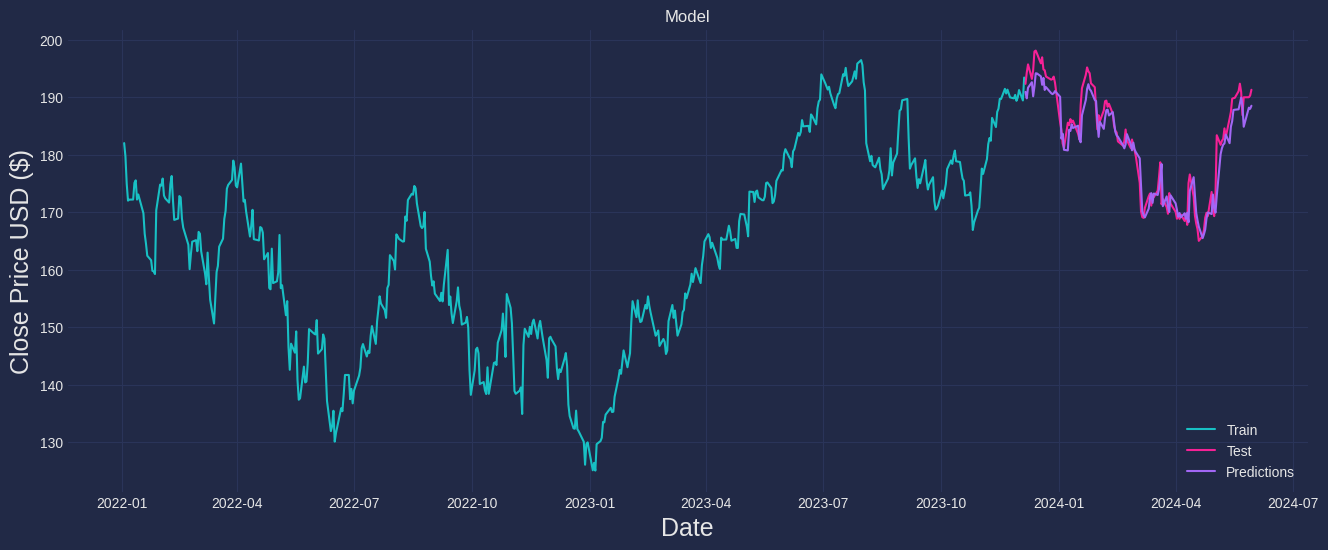

In [ ]:
# Establishing our network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_trainap_jittered.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=25))
model.add(Dense(units=1))   #dense a 10 unidades para que te devuelva 10 neuronas
model.summary()

# Compiling and training the LSTM model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_trainap_jittered, y_trainap_jittered, batch_size=1, epochs=10)

# Preparing test data for making predictions
test_data_ap = sdata_ap[tlen_ap - 60:, :]
x_testap = []
y_testap = data_ap[tlen_ap:,:]
for i in range(60, len(test_data_ap)):
    x_testap.append(test_data_ap[i -60:i, 0])

# Conversion to numpy and reshaping
x_testap = np.array(x_testap)
x_testap = np.reshape(x_testap, (x_testap.shape[0], x_testap.shape[1], 1))

# Making predictions
predictions_jittered = model.predict(x_testap)
predictions_jittered = scaler.inverse_transform(predictions_jittered)

# Obtaining the error (RMSE)
rmse = np.sqrt(mean_squared_error(y_testap, predictions_jittered))
print(f'Root Mean Squared Error: {rmse}')

# Plotting our predictions next to the actual values
dataset = data.filter(['Close'])
train = dataset[:tlen_ap]
test = dataset[tlen_ap:]
test['Predictions'] = predictions_jittered
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(test[['Close', 'Predictions']])
plt.legend(['Train', 'Test', 'Predictions'], loc='lower right')
plt.show()

#make a plot bigger, more focused on the purple and pink

###With Magnification

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_21 (LSTM)              (None, 60, 50)            10400     
                                                                 
 lstm_22 (LSTM)              (None, 60, 50)            20200     
                                                                 
 lstm_23 (LSTM)              (None, 25)                7600      
                                                                 
 dense_9 (Dense)             (None, 1)                 26        
                                                                 
Total params: 38226 (149.32 KB)
Trainable params: 38226 (149.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
848/848 [==============================] - 47s 44ms/step - loss: 0.1167
Epoch 2/10
848/848 [==============================] - 35s 41ms/st

<ipython-input-16-77f8f639bd96>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = predictions_magnified


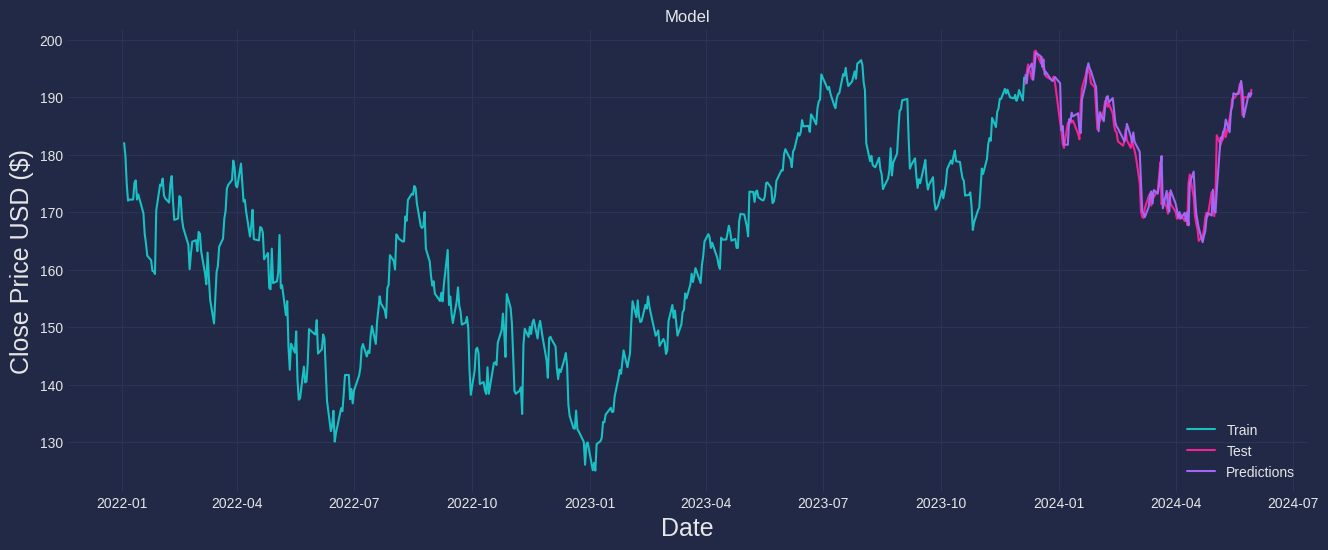

In [ ]:
# Establishing our network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_trainap_magnified.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=25))
model.add(Dense(units=1))   #dense a 10 unidades para que te devuelva 10 neuronas
model.summary()

# Compiling and training the LSTM model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_trainap_magnified, y_trainap_magnified, batch_size=1, epochs=10)

# Preparing test data for making predictions
test_data_ap = sdata_ap[tlen_ap - 60:, :]
x_testap = []
y_testap = data_ap[tlen_ap:,:]
for i in range(60, len(test_data_ap)):
    x_testap.append(test_data_ap[i -60:i, 0])

# Conversion to numpy and reshaping
x_testap = np.array(x_testap)
x_testap = np.reshape(x_testap, (x_testap.shape[0], x_testap.shape[1], 1))

# Making predictions
predictions_magnified = model.predict(x_testap)
predictions_magnified = scaler.inverse_transform(predictions_magnified)

# Obtaining the error (RMSE)
rmse = np.sqrt(mean_squared_error(y_testap, predictions_magnified))
print(f'Root Mean Squared Error: {rmse}')

# Plotting our predictions next to the actual values
dataset = data.filter(['Close'])
train = dataset[:tlen_ap]
test = dataset[tlen_ap:]
test['Predictions'] = predictions_magnified
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(test[['Close', 'Predictions']])
plt.legend(['Train', 'Test', 'Predictions'], loc='lower right')
plt.show()


## GRU model (3 hidden layers: 50, 50, 25 units) using 1 feature

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_6 (GRU)                 (None, 60, 50)            7950      
                                                                 
 gru_7 (GRU)                 (None, 60, 50)            15300     
                                                                 
 gru_8 (GRU)                 (None, 25)                5775      
                                                                 
 dense_10 (Dense)            (None, 1)                 26        
                                                                 
Total params: 29051 (113.48 KB)
Trainable params: 29051 (113.48 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
424/424 [==============================] - 22s 41ms/step - loss: 0.0767
Epoch 2/10
424/424 [==============================] - 17s 39ms/s

<ipython-input-17-d2f2c0c75356>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = predictions


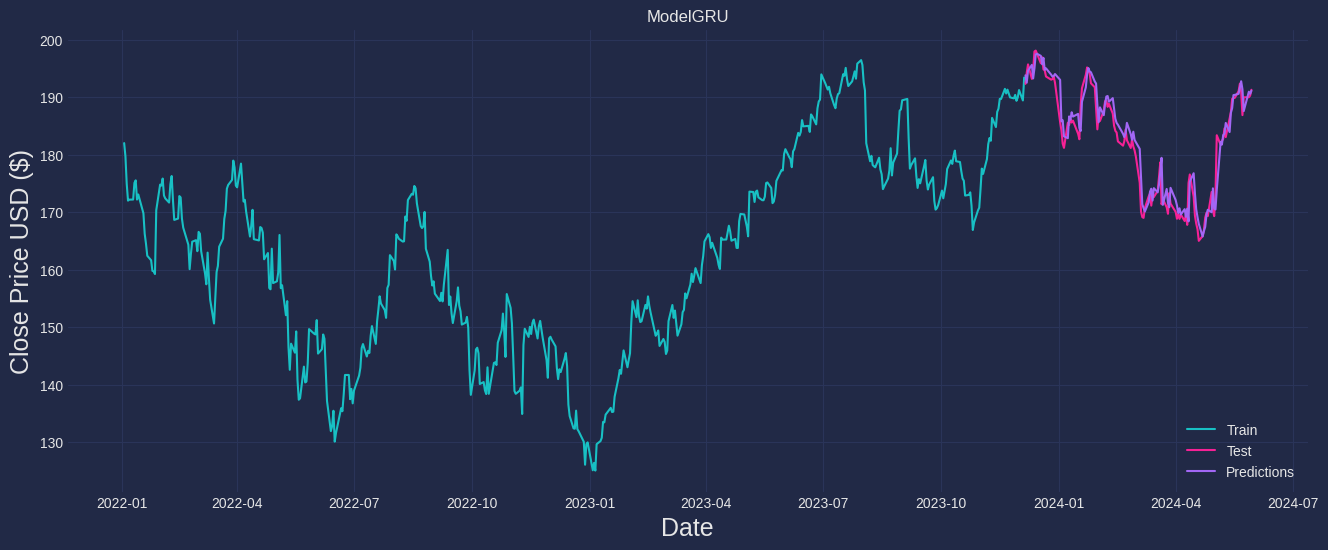

In [ ]:
# Establishing our network
modelGRU = Sequential()
modelGRU.add(GRU(units=50, return_sequences=True, input_shape=(x_trainap.shape[1], 1)))
modelGRU.add(GRU(units=50, return_sequences=True))
modelGRU.add(GRU(units=25))
modelGRU.add(Dense(units=1))
modelGRU.summary()

# Compiling and training the GRU model
modelGRU.compile(optimizer='adam', loss='mean_squared_error')
modelGRU.fit(x_trainap, y_trainap, batch_size=1, epochs=10)

# Preparing test data for making predictions
test_data_ap = sdata_ap[tlen_ap - 60:, :]
x_testap = []
y_testap = data_ap[tlen_ap:,:]
for i in range(60, len(test_data_ap)):
    x_testap.append(test_data_ap[i -60:i, 0])

# Conversion to numpy and reshaping
x_testap = np.array(x_testap)
x_testap = np.reshape(x_testap, (x_testap.shape[0], x_testap.shape[1], 1))

# Make the predictions
predictions = modelGRU.predict(x_testap)
predictions = scaler.inverse_transform(predictions)

# Obtaining the error
rmse = np.sqrt(mean_squared_error(y_testap, predictions))
print(f'Root Mean Squared Error: {rmse}')

# Plotting our predictions next to the actual values
dataset = data.filter(['Close'])
train = dataset[:tlen_ap]
test = dataset[tlen_ap:]
test['Predictions'] = predictions
#visualize the data
plt.figure(figsize=(16,6))
plt.title('ModelGRU')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(test[['Close', 'Predictions']])
plt.legend(['Train', 'Test', 'Predictions'], loc='lower right')
plt.show()

###With Jittering

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_9 (GRU)                 (None, 60, 50)            7950      
                                                                 
 gru_10 (GRU)                (None, 60, 50)            15300     
                                                                 
 gru_11 (GRU)                (None, 25)                5775      
                                                                 
 dense_11 (Dense)            (None, 1)                 26        
                                                                 
Total params: 29051 (113.48 KB)
Trainable params: 29051 (113.48 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
848/848 [==============================] - 40s 40ms/step - loss: 0.0632
Epoch 2/10
848/848 [==============================] - 33s 39ms/s

<ipython-input-18-ea6a54b58eb5>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = predictions_jittered


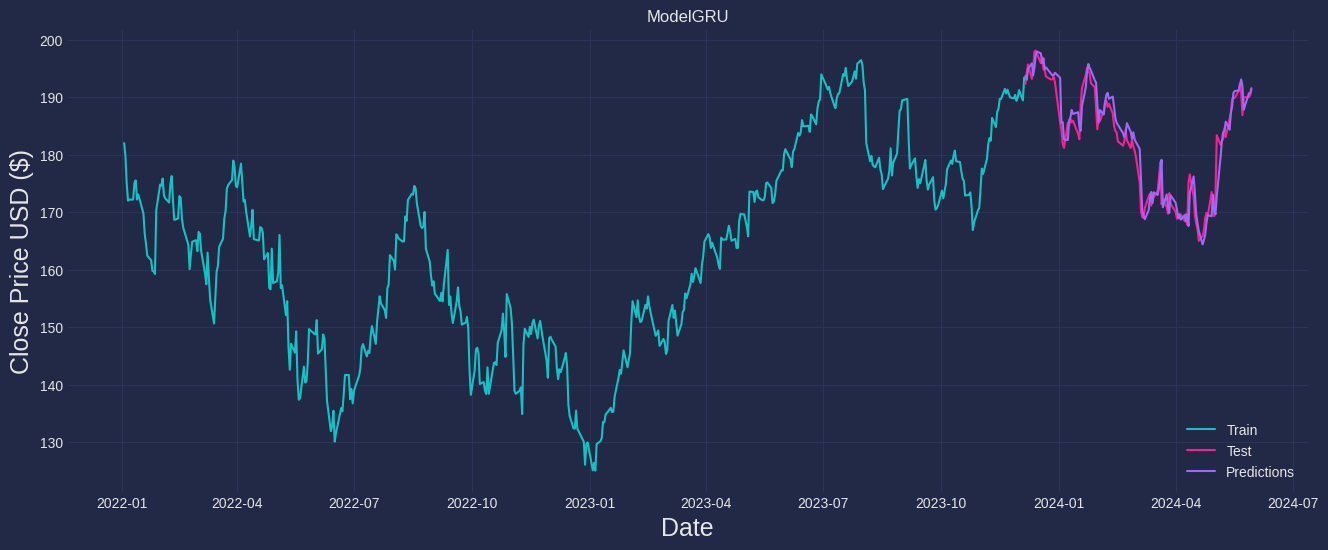

In [ ]:
# Establishing our network
modelGRU = Sequential()
modelGRU.add(GRU(units=50, return_sequences=True, input_shape=(x_trainap_jittered.shape[1], 1)))
modelGRU.add(GRU(units=50, return_sequences=True))
modelGRU.add(GRU(units=25))
modelGRU.add(Dense(units=1))
modelGRU.summary()

# Compiling and training the GRU model
modelGRU.compile(optimizer='adam', loss='mean_squared_error')
modelGRU.fit(x_trainap_jittered, y_trainap_jittered, batch_size=1, epochs=10)

# Preparing test data for making predictions
test_data_ap = sdata_ap[tlen_ap - 60:, :]
x_testap = []
y_testap = data_ap[tlen_ap:,:]
for i in range(60, len(test_data_ap)):
    x_testap.append(test_data_ap[i -60:i, 0])

# Conversion to numpy and reshaping
x_testap = np.array(x_testap)
x_testap = np.reshape(x_testap, (x_testap.shape[0], x_testap.shape[1], 1))

# Make the predictions
predictions_jittered = modelGRU.predict(x_testap)
predictions_jittered = scaler.inverse_transform(predictions_jittered)

# Obtaining the error
rmse = np.sqrt(mean_squared_error(y_testap, predictions_jittered))
print(f'Root Mean Squared Error: {rmse}')

# Plotting our predictions next to the actual values
dataset = data.filter(['Close'])
train = dataset[:tlen_ap]
test = dataset[tlen_ap:]
test['Predictions'] = predictions_jittered
#visualize the data
plt.figure(figsize=(16,6))
plt.title('ModelGRU')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(test[['Close', 'Predictions']])
plt.legend(['Train', 'Test', 'Predictions'], loc='lower right')
plt.show()

###With Magnification

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_12 (GRU)                (None, 60, 50)            7950      
                                                                 
 gru_13 (GRU)                (None, 60, 50)            15300     
                                                                 
 gru_14 (GRU)                (None, 25)                5775      
                                                                 
 dense_12 (Dense)            (None, 1)                 26        
                                                                 
Total params: 29051 (113.48 KB)
Trainable params: 29051 (113.48 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
848/848 [==============================] - 38s 39ms/step - loss: 0.0595
Epoch 2/10
848/848 [==============================] - 34s 40ms/s

<ipython-input-19-cb3ae75acbe6>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = predictions_magnified


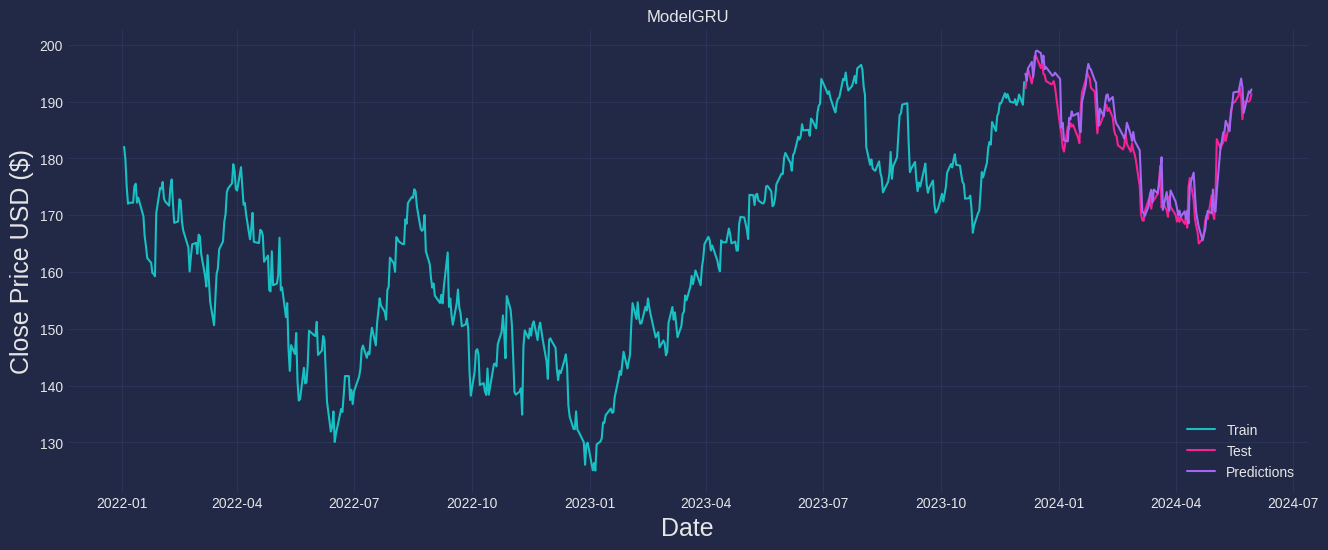

In [ ]:
# Establishing our network
modelGRU = Sequential()
modelGRU.add(GRU(units=50, return_sequences=True, input_shape=(x_trainap_magnified.shape[1], 1)))
modelGRU.add(GRU(units=50, return_sequences=True))
modelGRU.add(GRU(units=25))
modelGRU.add(Dense(units=1))
modelGRU.summary()

# Compiling and training the GRU model
modelGRU.compile(optimizer='adam', loss='mean_squared_error')
modelGRU.fit(x_trainap_magnified, y_trainap_magnified, batch_size=1, epochs=10)

# Preparing test data for making predictions
test_data_ap = sdata_ap[tlen_ap - 60:, :]
x_testap = []
y_testap = data_ap[tlen_ap:,:]
for i in range(60, len(test_data_ap)):
    x_testap.append(test_data_ap[i -60:i, 0])

# Conversion to numpy and reshaping
x_testap = np.array(x_testap)
x_testap = np.reshape(x_testap, (x_testap.shape[0], x_testap.shape[1], 1))

# Make the predictions
predictions_magnified = modelGRU.predict(x_testap)
predictions_magnified = scaler.inverse_transform(predictions_magnified)

# Obtaining the error
rmse = np.sqrt(mean_squared_error(y_testap, predictions_magnified))
print(f'Root Mean Squared Error: {rmse}')

# Plotting our predictions next to the actual values
dataset = data.filter(['Close'])
train = dataset[:tlen_ap]
test = dataset[tlen_ap:]
test['Predictions'] = predictions_magnified
#visualize the data
plt.figure(figsize=(16,6))
plt.title('ModelGRU')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(test[['Close', 'Predictions']])
plt.legend(['Train', 'Test', 'Predictions'], loc='lower right')
plt.show()

# Models using 6 features

## Predictions for 10 days from the past (error obtainable)

[*********************100%%**********************]  1 of 1 completed


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 60, 50)            11400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_25 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_13 (Dense)            (None, 25)                1275      
                                                                 
 dense_14 (Dense)            (None, 1)                 26        
                                                                 
Total params: 32901 (128.52 KB)
Trainable params: 329

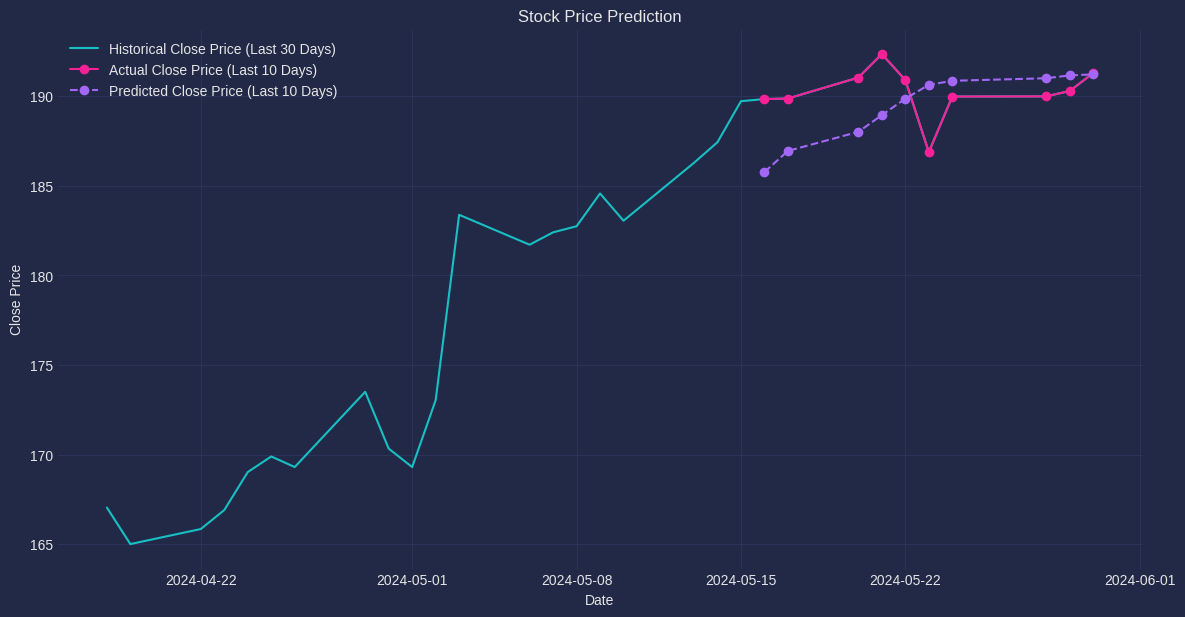

In [ ]:
# Fetching the data for our company

comp = 'AAPL'
data_ap = yf.download(comp, start='2022-01-01', end='2024-05-31')
data_ap = data_ap.reset_index()
data_ap.set_index('Date', inplace=True)

# Normalization
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_ap)

# Creating sequences
sequence_length = 60
sequences = []

for i in range(len(scaled_data) - sequence_length):
    sequence = scaled_data[i:i+sequence_length]
    target = scaled_data[i+sequence_length][3]  # Index 3 corresponds to the 'Close' price
    sequences.append((sequence, target))


# Split data into training and testing sets
train_size = int(len(sequences) * 0.8)
train_sequences = sequences[:train_size]
test_sequences = sequences[train_size:]

# Separate inputs and targets
X_train = np.array([seq[0] for seq in train_sequences])
y_train = np.array([seq[1] for seq in train_sequences])
X_test = np.array([seq[0] for seq in test_sequences])
y_test = np.array([seq[1] for seq in test_sequences])

# Reshape for LSTM input
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_train.shape[2]))
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn')


# ---------------------------------------------------------------------------------------------------------- #

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=25))
model.add(Dense(units=1))
model.summary()

# Compiling and training the model
model.compile(optimizer='adam', loss='mean_squared_error')      # can try SGD optimizer as well
model.fit(X_train, y_train, batch_size=32, epochs=10)

# ---------------------------------------------------------------------------------------------------------- #

# Predict
predictions = model.predict(X_test)

# Reverse the standard normalization for predictions
def reverse_standard_scaler(scaled_data, original_data, scaler):
    mean = scaler.mean_[3]  # Index 3 corresponds to the 'Close' price
    std = scaler.scale_[3]
    return scaled_data * std + mean

predictions = reverse_standard_scaler(predictions, data_ap, scaler)

# Evaluate the model
train_score = model.evaluate(X_train, y_train, verbose=0)
test_score = model.evaluate(X_test, y_test, verbose=0)

print(f'Train Score: {train_score}, Test Score: {test_score}')

# Predict 10 days
def predict_last_days(model, data, days, sequence_length, scaler):
    predictions = []
    current_sequence = data[-(sequence_length + days):]

    for i in range(days):
        current_sequence_scaled = scaler.transform(current_sequence[i:i+sequence_length])
        current_sequence_scaled = np.array(current_sequence_scaled).reshape(1, sequence_length, data.shape[1])
        next_value = model.predict(current_sequence_scaled)
        next_value_unscaled = reverse_standard_scaler(next_value, data, scaler)
        predictions.append(next_value_unscaled[0])

    return predictions

# Get predictions for the last 10 days
last_10_days_predictions = predict_last_days(model, data_ap.values, 10, sequence_length, scaler)

# Extract the actual 'Close' prices for the last 10 days
actual_last_10_days = data_ap['Close'][-10:].values

# Calculate the mean squared error
mse = np.sqrt(mean_squared_error(actual_last_10_days, last_10_days_predictions))
print(f'Root Mean Squared Error for the last 10 days: {mse}')

# Plot the actual vs predicted values for the last 10 days
plt.figure(figsize=(14, 7))

# Plot historical 'Close' prices for the last 30 days
last_30_days = data_ap.index[-30:]
plt.plot(last_30_days, data_ap['Close'][-30:], label='Historical Close Price (Last 30 Days)')

# Create a date range for the last 10 days
last_10_days_dates = data_ap.index[-10:]

# Plot the actual 'Close' prices for the last 10 days
plt.plot(last_10_days_dates, actual_last_10_days, marker='o', linestyle='-', label='Actual Close Price (Last 10 Days)')

# Plot the predictions for the last 10 days
plt.plot(last_10_days_dates, last_10_days_predictions, marker='o', linestyle='--', label='Predicted Close Price (Last 10 Days)')

plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

## Prediction for the future (no original values available as of now)

[*********************100%%**********************]  1 of 1 completed


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_26 (LSTM)              (None, 60, 50)            11400     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_27 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_3 (Dropout)         (None, 50)                0         
                                                                 
 dense_15 (Dense)            (None, 25)                1275      
                                                                 
 dense_16 (Dense)            (None, 1)                 26        
                                                                 
Total params: 32901 (128.52 KB)
Trainable params: 329

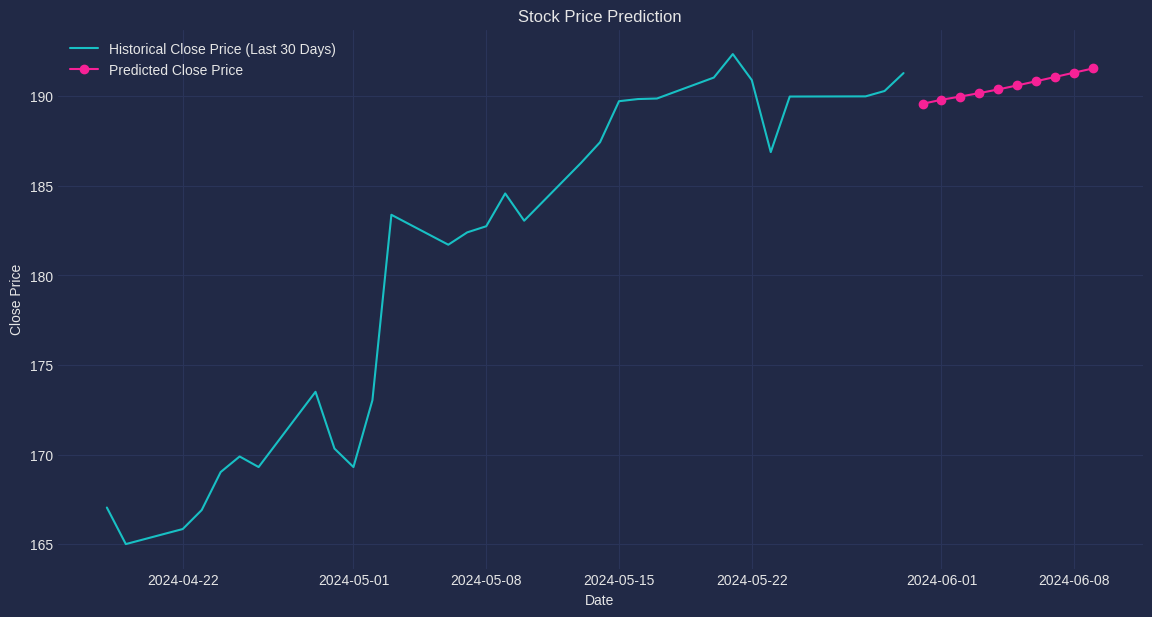

In [ ]:
# Fetching the data for our company

comp = 'AAPL'
data_ap = yf.download(comp, start='2022-01-01', end='2024-05-31')
data_ap = data_ap.reset_index()
data_ap.set_index('Date', inplace=True)

# Normalization
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_ap)

# Creating sequences
sequence_length = 60
sequences = []

for i in range(len(scaled_data) - sequence_length):
    sequence = scaled_data[i:i+sequence_length]
    target = scaled_data[i+sequence_length][3]  # Index 3 corresponds to the 'Close' price
    sequences.append((sequence, target))


# Split data into training and testing sets
train_size = int(len(sequences) * 0.8)
train_sequences = sequences[:train_size]
test_sequences = sequences[train_size:]

# Separate inputs and targets
X_train = np.array([seq[0] for seq in train_sequences])
y_train = np.array([seq[1] for seq in train_sequences])
X_test = np.array([seq[0] for seq in test_sequences])
y_test = np.array([seq[1] for seq in test_sequences])

# Reshape for LSTM input
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_train.shape[2]))
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn')

# ------------------------------------------------------------------------------------------------------------------- #

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=25))
model.add(Dense(units=1))
model.summary()

# Compiling and training the model
model.compile(optimizer='adam', loss='mean_squared_error')      # can try SGD optimizer as well
model.fit(X_train, y_train, batch_size=32, epochs=10)

# ------------------------------------------------------------------------------------------------------------------- #

# Predict
predictions = model.predict(X_test)

# Reverse the standard normalization for predictions
def reverse_standard_scaler(scaled_data, original_data, scaler):
    mean = scaler.mean_[3]  # Index 3 corresponds to the 'Close' price
    std = scaler.scale_[3]
    return scaled_data * std + mean

predictions = reverse_standard_scaler(predictions, data_ap, scaler)

# Evaluate the model
train_score = model.evaluate(X_train, y_train, verbose=0)
test_score = model.evaluate(X_test, y_test, verbose=0)

print(f'Train Score: {train_score}, Test Score: {test_score}')

# Predict next 10 days
def predict_next_days(model, data, days, sequence_length, scaler):
    predictions = []
    current_sequence = data[-sequence_length:].tolist()

    for _ in range(days):
        current_sequence_scaled = scaler.transform(current_sequence)
        current_sequence_scaled = np.array(current_sequence_scaled).reshape(1, sequence_length, data.shape[1])
        next_value = model.predict(current_sequence_scaled)
        next_value_unscaled = reverse_standard_scaler(next_value, data, scaler)
        predictions.append(next_value_unscaled[0])
        current_sequence.append(np.concatenate((current_sequence[-1][:data.shape[1]-1], next_value_unscaled), axis=None))
        current_sequence = current_sequence[1:]

    return predictions

# Predict for the next 10 days
next_10_days_predictions = predict_next_days(model, data_ap.values, 10, sequence_length, scaler)
print(f'Next 10 days predictions: {next_10_days_predictions}')

# ------------------------------------------------------------------------------------------------------------------- #

# Plot the predictions next to the original values
plt.figure(figsize=(14, 7))

# Plot historical 'Close' prices for the last 30 days
last_30_days = data_ap.index[-30:]
plt.plot(last_30_days, data_ap['Close'][-30:], label='Historical Close Price (Last 30 Days)')

# Create a date range for the predictions
last_date = data_ap.index[-1]
pred_dates = pd.date_range(last_date + pd.Timedelta(days=1), periods=10)

# Plot the predictions for the next 10 days
plt.plot(pred_dates, next_10_days_predictions, marker='o', label='Predicted Close Price')

plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()
